In [5]:
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio
fig_height_2col_inches = (3/4)*fig_width_2col_inches # standard ratio
fig_height_3col_inches = (3/4)*fig_width_3col_inches # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



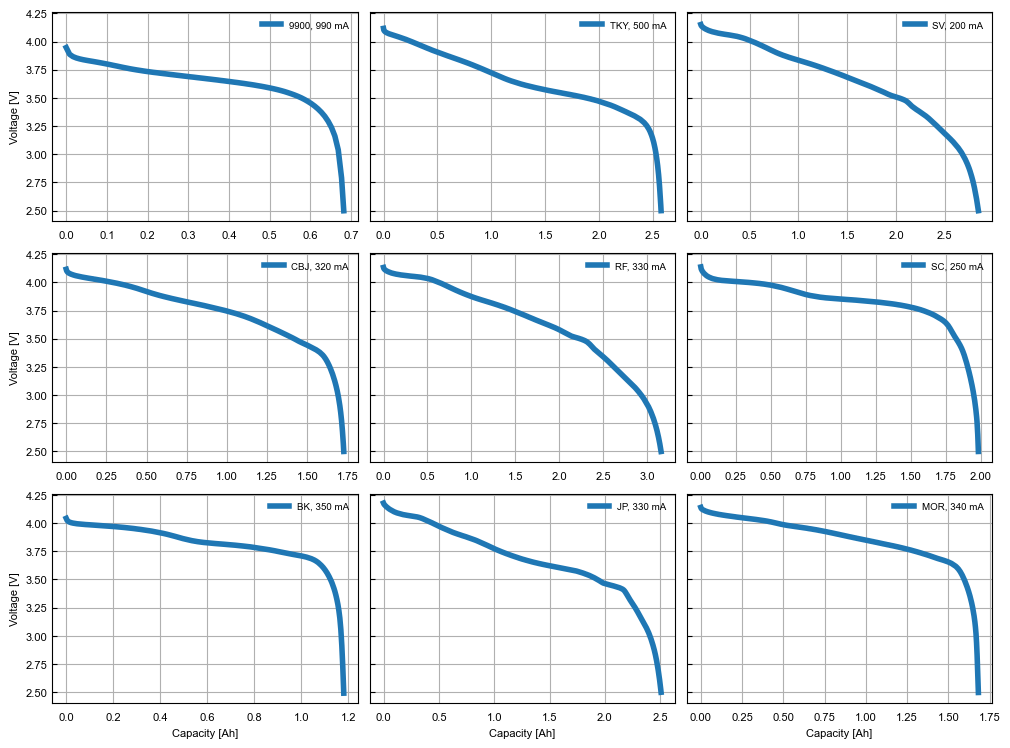

In [8]:

# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
xlsx_files = [f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')]

# 데이터 필터링 함수
def filter_data(df, Cycle_index=1, Step_type='CC DChg'):
    filtered_df = df[(df['Cycle Index'] == Cycle_index) & (df['Step Type'] == Step_type)]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    
    return capacity_data, voltage_data


legend_texts = ['9900, 990 mA', 'TKY, 500 mA', 'SV, 200 mA', 'CBJ, 320 mA', 'RF, 330 mA', 'SC, 250 mA', 'BK, 350 mA', 'JP, 330 mA', 'MOR, 340 mA']


# 서브플롯 설정
fig, axes = plt.subplots(3, 3, figsize=(fig_width_3col_inches, fig_height_3col_inches), sharey=True)
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# 각 파일에 대해 데이터를 읽고 그래프 그리기
for i, file in enumerate(xlsx_files):
    file_path = os.path.join(electrochemistry_dir, file)
    df = pd.read_excel(file_path, header=0, sheet_name='record')  # 엑셀 파일 읽기
    
    # 데이터 필터링
    capacity_data, voltage_data = filter_data(df)
    
    # 그래프 그리기
    axes[i].plot(capacity_data, voltage_data, label=f'{legend_texts[i]}', linewidth=4)

    axes[i].grid(True)
    axes[i].legend()
    # axes[i].tick_params(axis='both', which='major', labelsize=15)


axes[6].set_xlabel('Capacity [Ah]')
axes[7].set_xlabel('Capacity [Ah]')
axes[8].set_xlabel('Capacity [Ah]')
axes[0].set_ylabel('Voltage [V]')
axes[3].set_ylabel('Voltage [V]')
axes[6].set_ylabel('Voltage [V]')
plt.tight_layout()
plt.show()